___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

Data vocabulary:

1. #3 (age): age in years 
2. #4 (sex): sex (1 = male; 0 = female) 
3. #9 (cp): cp: chest pain type | Value 0: typical angina | Value 1: atypical angina | Value 2: non-anginal pain | Value 3: asymptomatic 
4. #10 (trestbps): resting blood pressure (in mm Hg on admission to the hospital) 
5. #12 (chol): serum cholestoral in mg/dl 
6. #16 (fbs): (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
7. #19 (restecg): resting electrocardiographic results | Value 0: normal | Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) | Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria 
8. #32 (thalach): maximum heart rate achieved 
9. #38 (exang): exercise induced angina (1 = yes; 0 = no) 
10. #40 (oldpeak): ST depression induced by exercise relative to rest 
11. #41 (slope): the slope of the peak exercise ST segment | Value 1: upsloping | Value 2: flat | Value 3: downsloping 
12. #44 (ca): number of major vessels (0-3) colored by flourosopy 
13. #51 (thal): 3 = normal; 6 = fixed defect; 7 = reversable defect 
14. #58 (num) (the predicted attribute): Value 0: < 50% diameter narrowing | Value 1: > 50% diameter narrowing 

# Import esential Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)
#pd.options.display.float_format = '{:.3f}'.format

# Ingest the data to notebook

In [2]:
df = pd.read_csv("heart.csv")

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.300,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.500,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.400,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.800,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.600,2,0,2,1


In [4]:
df.shape

(303, 14)

# EDA

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.000,54.366,9.082,29.000,47.500,55.000,61.000,77.000
sex,303.000,0.683,0.466,0.000,0.000,1.000,1.000,1.000
cp,303.000,0.967,1.032,0.000,0.000,1.000,2.000,3.000
trestbps,303.000,131.624,17.538,94.000,120.000,130.000,140.000,200.000
chol,303.000,246.264,51.831,126.000,211.000,240.000,274.500,564.000
fbs,303.000,0.149,0.356,0.000,0.000,0.000,0.000,1.000
restecg,303.000,0.528,0.526,0.000,0.000,1.000,1.000,2.000
thalach,303.000,149.647,22.905,71.000,133.500,153.000,166.000,202.000
exang,303.000,0.327,0.470,0.000,0.000,0.000,1.000,1.000
oldpeak,303.000,1.040,1.161,0.000,0.000,0.800,1.600,6.200


In [7]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000,-0.098,-0.069,0.279,0.214,0.121,-0.116,-0.399,0.097,0.210,-0.169,0.276,0.068,-0.225
sex,-0.098,1.000,-0.049,-0.057,-0.198,0.045,-0.058,-0.044,0.142,0.096,-0.031,0.118,0.210,-0.281
cp,-0.069,-0.049,1.000,0.048,-0.077,0.094,0.044,0.296,-0.394,-0.149,0.120,-0.181,-0.162,0.434
trestbps,0.279,-0.057,0.048,1.000,0.123,0.178,-0.114,-0.047,0.068,0.193,-0.121,0.101,0.062,-0.145
chol,0.214,-0.198,-0.077,0.123,1.000,0.013,-0.151,-0.010,0.067,0.054,-0.004,0.071,0.099,-0.085
fbs,0.121,0.045,0.094,0.178,0.013,1.000,-0.084,-0.009,0.026,0.006,-0.060,0.138,-0.032,-0.028
restecg,-0.116,-0.058,0.044,-0.114,-0.151,-0.084,1.000,0.044,-0.071,-0.059,0.093,-0.072,-0.012,0.137
thalach,-0.399,-0.044,0.296,-0.047,-0.010,-0.009,0.044,1.000,-0.379,-0.344,0.387,-0.213,-0.096,0.422
exang,0.097,0.142,-0.394,0.068,0.067,0.026,-0.071,-0.379,1.000,0.288,-0.258,0.116,0.207,-0.437
oldpeak,0.210,0.096,-0.149,0.193,0.054,0.006,-0.059,-0.344,0.288,1.000,-0.578,0.223,0.210,-0.431


<AxesSubplot:>

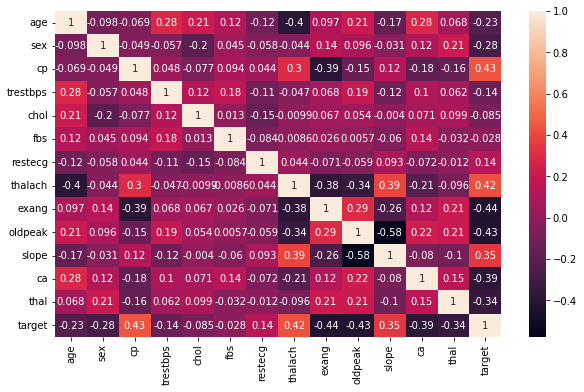

In [8]:
sns.heatmap(df.corr(), annot=True)

In [9]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

<AxesSubplot:xlabel='target', ylabel='count'>

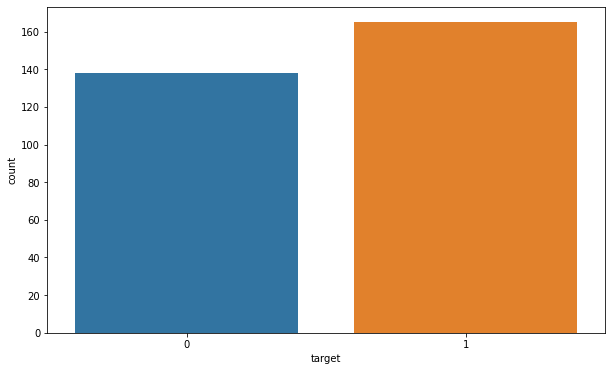

In [10]:
sns.countplot(df.target)

<AxesSubplot:xlabel='age'>

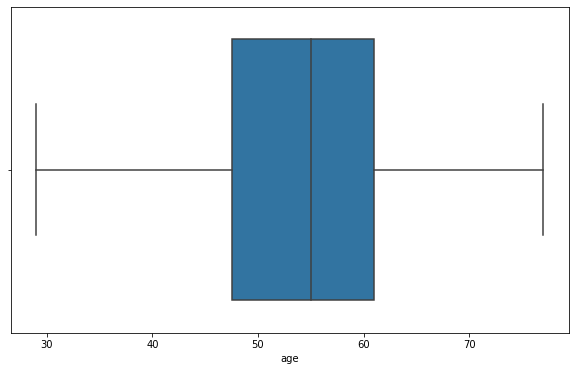

In [11]:
sns.boxplot(df.age)

In [12]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

<AxesSubplot:xlabel='chol'>

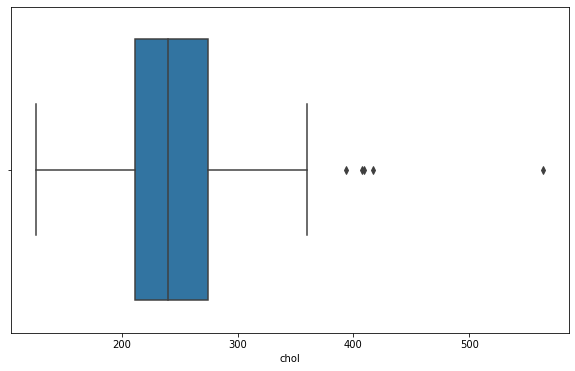

In [13]:
sns.boxplot(df.chol)

<AxesSubplot:xlabel='fbs'>

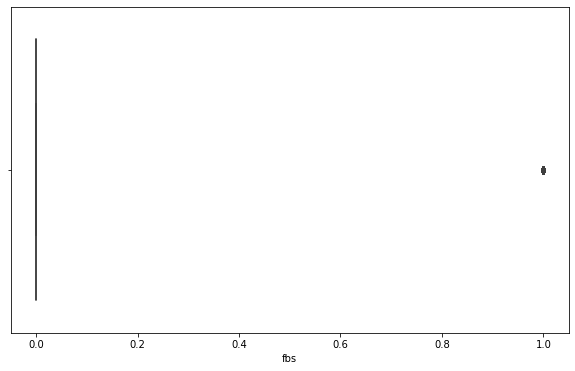

In [14]:
sns.boxplot(df.fbs)

In [15]:
df.restecg.value_counts()

1    152
0    147
2      4
Name: restecg, dtype: int64

<AxesSubplot:xlabel='thalach'>

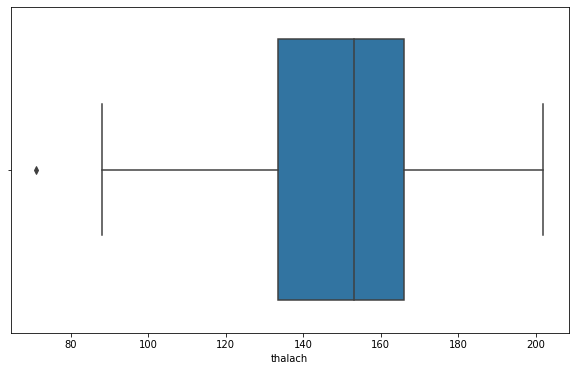

In [16]:
sns.boxplot(df.thalach)

In [17]:
df.exang.value_counts()

0    204
1     99
Name: exang, dtype: int64

<AxesSubplot:xlabel='oldpeak'>

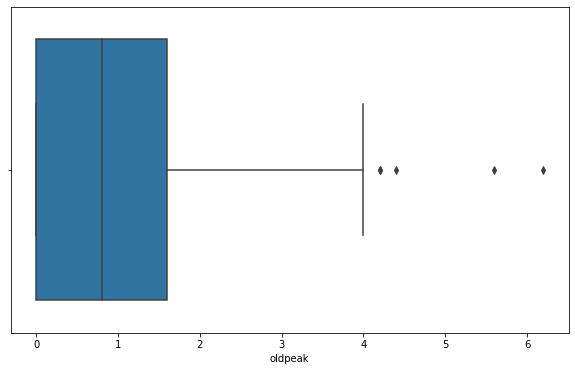

In [18]:
sns.boxplot(df.oldpeak)

In [19]:
df.slope.value_counts()

2    142
1    140
0     21
Name: slope, dtype: int64

In [20]:
df.ca.value_counts()

0    175
1     65
2     38
3     20
4      5
Name: ca, dtype: int64

In [21]:
df.thal.value_counts()

2    166
3    117
1     18
0      2
Name: thal, dtype: int64

<AxesSubplot:>

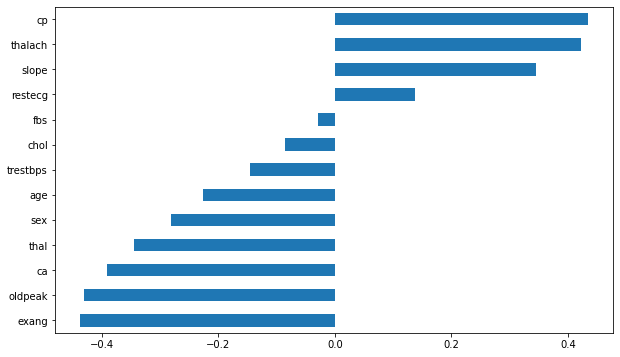

In [22]:
df.corr()["target"].drop("target").sort_values().plot.barh()

# Data Preprocessing

In [23]:
X = df.drop(["target"], axis=1)
y = df.target

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [26]:
scaler = StandardScaler()

In [27]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Implement Logistic Regression and Evaluate

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
log_model = LogisticRegression(random_state=42)

In [30]:
log_model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

In [31]:
y_pred = log_model.predict(X_test_scaled)

In [32]:
y_pred_proba = log_model.predict_proba(X_test_scaled)

In [33]:
test_data = pd.concat([X_test, y_test], axis=1)
test_data["pred"] = y_pred
test_data["pred_proba"] = y_pred_proba[:,1]
test_data.sample(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,pred,pred_proba
281,52,1,0,128,204,1,1,156,1,1.000,1,0,0,0,1,0.796
0,63,1,3,145,233,1,0,150,0,2.300,0,0,1,1,1,0.875
85,67,0,2,115,564,0,0,160,0,1.600,1,0,3,1,0,0.256
252,62,0,0,138,294,1,1,106,0,1.900,1,3,2,0,0,0.082
26,59,1,2,150,212,1,1,157,0,1.600,2,0,2,1,1,0.888
4,57,0,0,120,354,0,1,163,1,0.600,2,0,2,1,1,0.633
70,54,1,2,120,258,0,0,147,0,0.400,1,0,3,1,1,0.630
95,53,1,0,142,226,0,0,111,1,0.000,2,0,3,1,0,0.077
297,59,1,0,164,176,1,0,90,0,1.000,1,2,1,0,0,0.125
133,41,1,1,110,235,0,1,153,0,0.000,2,0,2,1,1,0.903


## Model Performance on Classification Tasks

In [34]:
from sklearn.metrics import confusion_matrix, classification_report

In [35]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [36]:
eval_metric(log_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[19  9]
 [ 3 30]]
              precision    recall  f1-score   support

           0       0.86      0.68      0.76        28
           1       0.77      0.91      0.83        33

    accuracy                           0.80        61
   macro avg       0.82      0.79      0.80        61
weighted avg       0.81      0.80      0.80        61


Train_Set
[[ 85  25]
 [ 13 119]]
              precision    recall  f1-score   support

           0       0.87      0.77      0.82       110
           1       0.83      0.90      0.86       132

    accuracy                           0.84       242
   macro avg       0.85      0.84      0.84       242
weighted avg       0.85      0.84      0.84       242



## Cross Validate

In [37]:
from sklearn.model_selection import cross_validate

In [38]:
model = LogisticRegression(random_state=42)

scores = cross_validate(model, X_train_scaled, y_train, scoring = ['precision','recall','f1','accuracy'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores


,fit_time,score_time,test_precision,test_recall,test_f1,test_accuracy
1,0.006,0.004,0.800,0.857,0.828,0.800
2,0.004,0.003,0.706,0.857,0.774,0.720
3,0.005,0.003,0.786,0.846,0.815,0.792
4,0.004,0.006,0.800,0.923,0.857,0.833
5,0.011,0.005,0.917,0.846,0.880,0.875
6,0.010,0.003,0.733,0.846,0.786,0.750
7,0.010,0.006,0.857,0.923,0.889,0.875
8,0.006,0.002,0.917,0.846,0.880,0.875
9,0.006,0.005,0.917,0.846,0.880,0.875
10,0.006,0.005,0.800,0.923,0.857,0.833


In [39]:
df_scores.mean()[2:]

test_precision   0.823
test_recall      0.871
test_f1          0.845
test_accuracy    0.823
dtype: float64

In [40]:
model = LogisticRegression(random_state=42)

scores = cross_validate(model, X_train_scaled, y_train, scoring = ['precision','recall','f1','accuracy'], cv = 50)
#df_scores = pd.DataFrame(scores, index = range(1, 11))
#df_scores
df_scores =pd.DataFrame(scores, index = range(1, 51))
df_scores

,fit_time,score_time,test_precision,test_recall,test_f1,test_accuracy
1,0.011,0.007,1.000,0.667,0.800,0.800
2,0.009,0.006,1.000,1.000,1.000,1.000
3,0.017,0.009,0.667,0.667,0.667,0.600
4,0.010,0.008,0.750,1.000,0.857,0.800
5,0.011,0.003,1.000,0.667,0.800,0.800
6,0.006,0.005,0.600,1.000,0.750,0.600
7,0.007,0.007,1.000,1.000,1.000,1.000
8,0.007,0.005,0.750,1.000,0.857,0.800
9,0.013,0.004,1.000,0.667,0.800,0.800
10,0.005,0.003,0.750,1.000,0.857,0.800


In [41]:
df_scores.mean()[2:]

test_precision   0.842
test_recall      0.877
test_f1          0.841
test_accuracy    0.823
dtype: float64

In [42]:
eval_metric(log_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[19  9]
 [ 3 30]]
              precision    recall  f1-score   support

           0       0.86      0.68      0.76        28
           1       0.77      0.91      0.83        33

    accuracy                           0.80        61
   macro avg       0.82      0.79      0.80        61
weighted avg       0.81      0.80      0.80        61


Train_Set
[[ 85  25]
 [ 13 119]]
              precision    recall  f1-score   support

           0       0.87      0.77      0.82       110
           1       0.83      0.90      0.86       132

    accuracy                           0.84       242
   macro avg       0.85      0.84      0.84       242
weighted avg       0.85      0.84      0.84       242



## GridSearchCV

In [43]:
from sklearn.model_selection import GridSearchCV  

model = LogisticRegression(random_state=42,)

penalty = ["l1", "l2"]
C = np.logspace(0, 10, 20)
class_weight= ["balanced", None] 
# The "balanced" mode uses the values of y to automatically adjust weights inversely proportional to class frequencies 
# in the input data
solver = ["lbfgs", "liblinear", "sag", "saga"]

param_grid = {"penalty" : penalty,
              "C" : C,
              "class_weight":class_weight,
              "solver":solver}


grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          cv=10,
                          scoring = "recall",
                          n_jobs = -1)

In [44]:
grid_model.fit(X_train_scaled,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(random_state=42), n_jobs=-1,
             param_grid={'C': array([1.00000000e+00, 3.35981829e+00, 1.12883789e+01, 3.79269019e+01,
       1.27427499e+02, 4.28133240e+02, 1.43844989e+03, 4.83293024e+03,
       1.62377674e+04, 5.45559478e+04, 1.83298071e+05, 6.15848211e+05,
       2.06913808e+06, 6.95192796e+06, 2.33572147e+07, 7.84759970e+07,
       2.63665090e+08, 8.85866790e+08, 2.97635144e+09, 1.00000000e+10]),
                         'class_weight': ['balanced', None],
                         'penalty': ['l1', 'l2'],
                         'solver': ['lbfgs', 'liblinear', 'sag', 'saga']},
             scoring='recall')

In [45]:
grid_model.best_params_

{'C': 1.0, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'}

In [46]:
eval_metric(log_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[19  9]
 [ 3 30]]
              precision    recall  f1-score   support

           0       0.86      0.68      0.76        28
           1       0.77      0.91      0.83        33

    accuracy                           0.80        61
   macro avg       0.82      0.79      0.80        61
weighted avg       0.81      0.80      0.80        61


Train_Set
[[ 85  25]
 [ 13 119]]
              precision    recall  f1-score   support

           0       0.87      0.77      0.82       110
           1       0.83      0.90      0.86       132

    accuracy                           0.84       242
   macro avg       0.85      0.84      0.84       242
weighted avg       0.85      0.84      0.84       242



In [47]:
eval_metric(grid_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[19  9]
 [ 4 29]]
              precision    recall  f1-score   support

           0       0.83      0.68      0.75        28
           1       0.76      0.88      0.82        33

    accuracy                           0.79        61
   macro avg       0.79      0.78      0.78        61
weighted avg       0.79      0.79      0.78        61


Train_Set
[[ 87  23]
 [ 14 118]]
              precision    recall  f1-score   support

           0       0.86      0.79      0.82       110
           1       0.84      0.89      0.86       132

    accuracy                           0.85       242
   macro avg       0.85      0.84      0.84       242
weighted avg       0.85      0.85      0.85       242



GridSearch decreased the scores so it will not be used

## ROC (Receiver Operating Curve) and AUC (Area Under Curve)

In [48]:
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_auc_score, auc, roc_curve, average_precision_score, precision_recall_curve

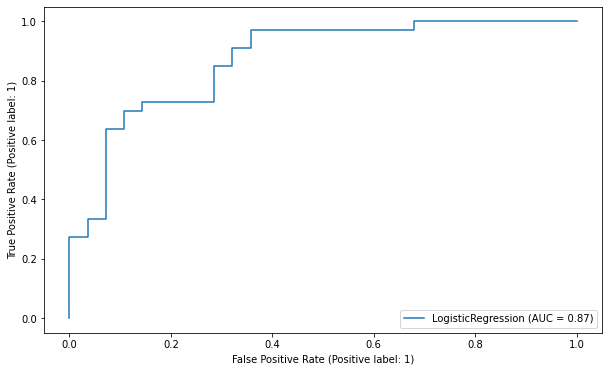

In [49]:
plot_roc_curve(log_model, X_test_scaled, y_test);

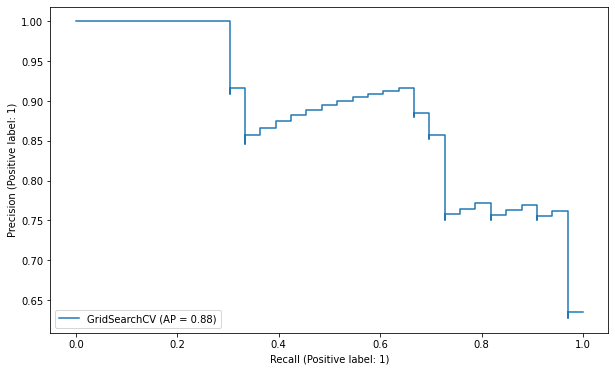

In [50]:
plot_precision_recall_curve(grid_model, X_test_scaled, y_test);

In [51]:
y_pred_proba = log_model.predict_proba(X_train_scaled)
roc_auc_score(y_train, y_pred_proba[:,1])

0.9279614325068871

In [52]:
fp_rate, tp_rate, thresholds = roc_curve(y_train, y_pred_proba[:,1])

In [53]:
optimal_idx = np.argmax(tp_rate - fp_rate)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.598181635122485

In [54]:
y_pred2 = pd.Series(log_model.predict_proba(X_test_scaled)[:,1]).apply(lambda x : 1 if x >= optimal_threshold else 0)

In [55]:
print(confusion_matrix(y_test,y_pred2))
print(classification_report(y_test,y_pred2))

[[19  9]
 [ 4 29]]
              precision    recall  f1-score   support

           0       0.83      0.68      0.75        28
           1       0.76      0.88      0.82        33

    accuracy                           0.79        61
   macro avg       0.79      0.78      0.78        61
weighted avg       0.79      0.79      0.78        61



In [57]:
y_train_pred2 = pd.Series(log_model.predict_proba(X_train_scaled)[:,1]).apply(lambda x : 1 if x >= optimal_threshold else 0)
print(confusion_matrix(y_train, y_train_pred2))
print(classification_report(y_train, y_train_pred2))

[[ 94  16]
 [ 17 115]]
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       110
           1       0.88      0.87      0.87       132

    accuracy                           0.86       242
   macro avg       0.86      0.86      0.86       242
weighted avg       0.86      0.86      0.86       242



In [56]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[19  9]
 [ 3 30]]
              precision    recall  f1-score   support

           0       0.86      0.68      0.76        28
           1       0.77      0.91      0.83        33

    accuracy                           0.80        61
   macro avg       0.82      0.79      0.80        61
weighted avg       0.81      0.80      0.80        61



# Implement KNN and Evaluate

In [58]:
from sklearn.neighbors import KNeighborsClassifier, NearestNeighbors
from sklearn.model_selection import cross_val_predict

In [59]:
knn = KNeighborsClassifier(n_neighbors=7,)

In [60]:
# k value
import math
math.sqrt(len(y_test))

7.810249675906654

In [61]:
y_pred_knn = cross_val_predict(knn, X_test, y_test, cv=5)

In [62]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.50      0.50      0.50        28
           1       0.58      0.58      0.58        33

    accuracy                           0.54        61
   macro avg       0.54      0.54      0.54        61
weighted avg       0.54      0.54      0.54        61



---

In [63]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

In [64]:
test_error_rates = []


for k in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train_scaled,y_train) 
   
    y_pred_test = knn_model.predict(X_test_scaled)
    
    test_error = 1 - accuracy_score(y_test,y_pred_test)
    test_error_rates.append(test_error)

Text(0, 0.5, 'Error Rate')

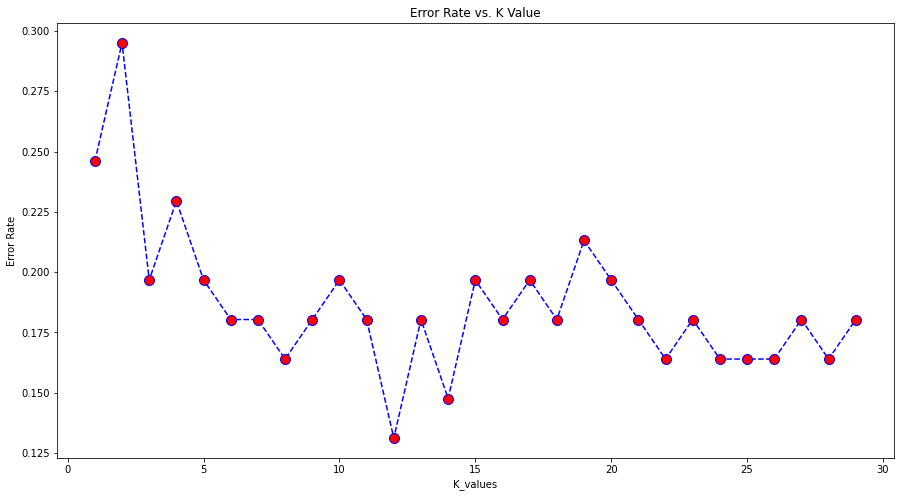

In [66]:
plt.figure(figsize=(15,8))
plt.plot(range(1,30), test_error_rates, color='blue', linestyle='--', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')

In [67]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set\n")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set\n")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [68]:
knn = KNeighborsClassifier(n_neighbors=8)

knn.fit(X_train_scaled,y_train)
print('WITH K=8\n')
eval_metric(knn, X_train_scaled, y_train, X_test_scaled, y_test)

WITH K=8

Test_Set

[[21  7]
 [ 3 30]]
              precision    recall  f1-score   support

           0       0.88      0.75      0.81        28
           1       0.81      0.91      0.86        33

    accuracy                           0.84        61
   macro avg       0.84      0.83      0.83        61
weighted avg       0.84      0.84      0.83        61


Train_Set

[[ 92  18]
 [ 14 118]]
              precision    recall  f1-score   support

           0       0.87      0.84      0.85       110
           1       0.87      0.89      0.88       132

    accuracy                           0.87       242
   macro avg       0.87      0.87      0.87       242
weighted avg       0.87      0.87      0.87       242



In [69]:
knn = KNeighborsClassifier(n_neighbors=12)

knn.fit(X_train_scaled,y_train)
print('WITH K=12\n')
eval_metric(knn, X_train_scaled, y_train, X_test_scaled, y_test)

WITH K=12

Test_Set

[[22  6]
 [ 2 31]]
              precision    recall  f1-score   support

           0       0.92      0.79      0.85        28
           1       0.84      0.94      0.89        33

    accuracy                           0.87        61
   macro avg       0.88      0.86      0.87        61
weighted avg       0.87      0.87      0.87        61


Train_Set

[[ 91  19]
 [ 16 116]]
              precision    recall  f1-score   support

           0       0.85      0.83      0.84       110
           1       0.86      0.88      0.87       132

    accuracy                           0.86       242
   macro avg       0.85      0.85      0.85       242
weighted avg       0.86      0.86      0.86       242



K = 12 selected

In [70]:
from sklearn.model_selection import cross_val_score, cross_validate

In [72]:
model = KNeighborsClassifier(n_neighbors=12)

scores = cross_validate(model, X_train_scaled, y_train, scoring = ['accuracy', 'precision','recall',
                                                                   'f1'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
1,0.002,0.006,0.920,0.929,0.929,0.929
2,0.001,0.004,0.640,0.647,0.786,0.710
3,0.001,0.005,0.750,0.733,0.846,0.786
4,0.001,0.004,0.875,0.812,1.000,0.897
5,0.002,0.003,0.875,1.000,0.769,0.870
6,0.001,0.006,0.750,0.733,0.846,0.786
7,0.005,0.010,0.917,0.923,0.923,0.923
8,0.002,0.004,0.875,0.917,0.846,0.880
9,0.001,0.004,0.875,0.917,0.846,0.880
10,0.001,0.005,0.792,0.786,0.846,0.815


In [73]:
df_scores.mean()[2:]

test_accuracy    0.827
test_precision   0.840
test_recall      0.864
test_f1          0.847
dtype: float64

In [74]:
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve, plot_roc_curve, roc_auc_score, roc_curve

In [75]:
knn_model = KNeighborsClassifier(n_neighbors=12).fit(X_train_scaled, y_train)

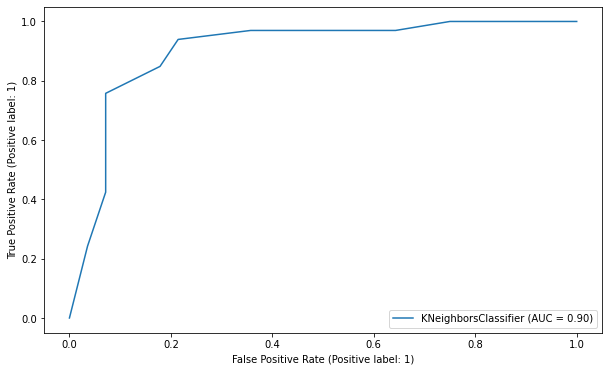

In [76]:
plot_roc_curve(knn_model, X_test_scaled, y_test)

In [77]:
y_pred_proba = knn_model.predict_proba(X_test_scaled)
roc_auc_score(y_test, y_pred_proba[:,1])

0.9031385281385281

# Visually compare models based on your chosen metric

In [80]:
eval_metric(log_model,X_train_scaled,y_train,X_test_scaled,y_test)

Test_Set

[[19  9]
 [ 3 30]]
              precision    recall  f1-score   support

           0       0.86      0.68      0.76        28
           1       0.77      0.91      0.83        33

    accuracy                           0.80        61
   macro avg       0.82      0.79      0.80        61
weighted avg       0.81      0.80      0.80        61


Train_Set

[[ 85  25]
 [ 13 119]]
              precision    recall  f1-score   support

           0       0.87      0.77      0.82       110
           1       0.83      0.90      0.86       132

    accuracy                           0.84       242
   macro avg       0.85      0.84      0.84       242
weighted avg       0.85      0.84      0.84       242



In [81]:
eval_metric(knn_model,X_train_scaled,y_train,X_test_scaled,y_test)

Test_Set

[[22  6]
 [ 2 31]]
              precision    recall  f1-score   support

           0       0.92      0.79      0.85        28
           1       0.84      0.94      0.89        33

    accuracy                           0.87        61
   macro avg       0.88      0.86      0.87        61
weighted avg       0.87      0.87      0.87        61


Train_Set

[[ 91  19]
 [ 16 116]]
              precision    recall  f1-score   support

           0       0.85      0.83      0.84       110
           1       0.86      0.88      0.87       132

    accuracy                           0.86       242
   macro avg       0.85      0.85      0.85       242
weighted avg       0.86      0.86      0.86       242



# Chose best model and make a random prediction 

knn_model is chosen as best model

In [82]:
scaler = StandardScaler().fit(X)

In [83]:
import pickle
pickle.dump(scaler, open("scaler_heart_stroke", 'wb'))

In [84]:
X_scaled = scaler.transform(X)

In [85]:
final_model = knn.fit(X_scaled, y)

In [100]:
pickle.dump(final_model, open("final_model_heart_stroke", 'wb'))

In [88]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.000,54.366,9.082,29.000,47.500,55.000,61.000,77.000
sex,303.000,0.683,0.466,0.000,0.000,1.000,1.000,1.000
cp,303.000,0.967,1.032,0.000,0.000,1.000,2.000,3.000
trestbps,303.000,131.624,17.538,94.000,120.000,130.000,140.000,200.000
chol,303.000,246.264,51.831,126.000,211.000,240.000,274.500,564.000
fbs,303.000,0.149,0.356,0.000,0.000,0.000,0.000,1.000
restecg,303.000,0.528,0.526,0.000,0.000,1.000,1.000,2.000
thalach,303.000,149.647,22.905,71.000,133.500,153.000,166.000,202.000
exang,303.000,0.327,0.470,0.000,0.000,0.000,1.000,1.000
oldpeak,303.000,1.040,1.161,0.000,0.000,0.800,1.600,6.200


In [90]:
my_dict =  {"age"       :   [21,45,65]	,
            "sex"       :   [0,1,1]     ,
            "cp"        :   [0,1,2]     ,
            "trestbps"  :   [146,105,130],
            "chol"      :   [200,250,300],
            "fbs"	    :   [0,1,1]     ,
            "restecg"   :   [1,2,1]     ,
            "thalach"	:   [130,160,140],
            "exang"	    :   [1,0,0]     ,
            "oldpeak"	:   [2,1,3]     ,
            "slope"	    :   [2,3,1]     ,
            "ca"	    :   [2,1,3]     ,
            "thal"      :   [3,1,2]
            }

In [92]:
sample = pd.DataFrame(my_dict)
sample

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,21,0,0,146,200,0,1,130,1,2,2,2,3
1,45,1,1,105,250,1,2,160,0,1,3,1,1
2,65,1,2,130,300,1,1,140,0,3,1,3,2


In [98]:
knn_final_model = pickle.load(open("scaler_heart_stroke", "rb"))

In [99]:
sample_scaled = knn_final_model.transform(sample)
sample_scaled

array([[-3.67993411, -1.46841752, -0.93851463,  0.82106867, -0.89407462,
        -0.41763453,  0.89896224, -0.85916731,  1.43548113,  0.82852939,
         0.97635214,  1.24459328,  1.12302895],
       [-1.03300228,  0.68100522,  0.03203122, -1.52056038,  0.07219949,
         2.394438  ,  2.80375634,  0.45274783, -0.69663055, -0.03416616,
         2.60181751,  0.26508221, -2.14887271],
       [ 1.17277425,  0.68100522,  1.00257707, -0.09273778,  1.03847361,
         2.394438  ,  0.89896224, -0.42186226, -0.69663055,  1.69122495,
        -0.64911323,  2.22410436, -0.51292188]])

In [101]:
final_model = pickle.load(open("final_model_heart_stroke", "rb"))

In [102]:
predictions = final_model.predict(sample_scaled)
predictions_proba = final_model.predict_proba(sample_scaled)


In [103]:
sample["pred_proba"] = predictions_proba[:,1]
sample["pred_0.50"] = predictions
sample

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,pred_proba,pred_0.50
0,21,0,0,146,200,0,1,130,1,2,2,2,3,0.250,0
1,45,1,1,105,250,1,2,160,0,1,3,1,1,0.833,1
2,65,1,2,130,300,1,1,140,0,3,1,3,2,0.333,0
